<a href="https://colab.research.google.com/github/MinhLe2508/MinhLe2508/blob/main/Finetune_model_for_specified_classes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 7.5 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 48.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
from ultralytics import YOLO
from pathlib import Path
from roboflow import Roboflow
import cv2
import numpy as np
import matplotlib.pyplot as plt

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### Download dataset from roboflow

Link: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc

https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/dataset/20/images/bcbd164fc498b1e96ccd91e436024a4b?split=train

In [ ]:
Path("datasets").mkdir(exist_ok=True)
%cd datasets
rf = Roboflow(api_key="UxApJs5oZUkmngdc3qdV")
project = rf.workspace("roboflow-jvuqo").project("football-players-detection-3zvbc")
dataset = project.version(4).download("yolov8")
%cd ..

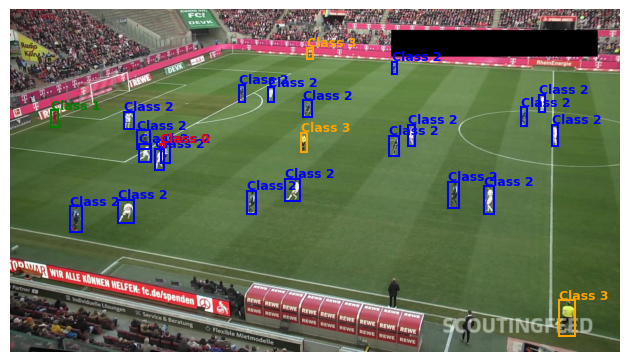

In [ ]:
## Print a training sample
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

# File paths

# I moved my datasets folder to my drive. You might need to change this variable
route = '/content/drive/MyDrive/football/roboflow-football/football-players-detection-4/train/'
image_path = route + 'images/2e57b9_1_8_png.rf.3ad6daa99d04cabafdb0a2d7a80d68dc.jpg'
label_path = route + 'labels/2e57b9_1_8_png.rf.3ad6daa99d04cabafdb0a2d7a80d68dc.txt'

# Load image
image = Image.open(image_path)
width, height = image.size

# Read label file (YOLO format: class x_center y_center width height in relative coords)
with open(label_path, 'r') as f:
    lines = f.readlines()

# Create plot
fig, ax = plt.subplots(1)
ax.imshow(image)

# Define colors for each class (up to 4)
colors = ['red', 'green', 'blue', 'orange']

# Draw bounding boxes
for line in lines:
    parts = line.strip().split()
    cls, x_center, y_center, w, h = map(float, parts)

    # Convert from relative to absolute coordinates
    x_center *= width
    y_center *= height
    w *= width
    h *= height

    # Convert to top-left corner
    x = x_center - w / 2
    y = y_center - h / 2

    # Draw rectangle
    rect = patches.Rectangle((x, y), w, h, linewidth=1.5, edgecolor=colors[int(cls) % len(colors)], facecolor='none')
    ax.add_patch(rect)

    # Draw class label
    ax.text(x, y - 5, f'Class {int(cls)}', color=colors[int(cls) % len(colors)], fontsize=9, weight='bold')

# Show image
plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
path_dataset = Path("/content/drive/MyDrive/football/roboflow-football/football-players-detection-4")
path_yaml = path_dataset/ "data.yaml"


len_train = len(list((path_dataset/ "train/images").iterdir()))
len_val = len(list((path_dataset/ "valid/images").iterdir()))
len_test = len(list((path_dataset/ "test/images").iterdir()))
print(f"Number of examples: train-{len_train}, val-{len_val}, test-{len_test}")

Number of examples: train-204, val-38, test-13


### Train YOLOv8

In [ ]:
model = YOLO("yolov8m.pt")

In [ ]:
model.train(data=str(path_yaml), epochs=300, imgsz=640, device=0, batch=16)

Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/football/roboflow-football/football-players-detection-4/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=300, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patien

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

 18                  -1  2   1846272  ultralytics.nn.modules.block.C2f             [576, 384, 2]                 
 19                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  2   4207104  ultralytics.nn.modules.block.C2f             [960, 576, 2]                 
 22        [15, 18, 21]  1   3778012  ultralytics.nn.modules.head.Detect           [4, [192, 384, 576]]          
Model summary: 169 layers, 25,858,636 parameters, 25,858,620 gradients, 79.1 GFLOPs

Transferred 469/475 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 3.0±5.5 ms, read: 3.2±6.3 MB/s, size: 235.5 KB)


train: Scanning /content/drive/MyDrive/football/roboflow-football/football-players-detection-4/train/labels... 204 images, 0 backgrounds, 0 corrupt: 100%|██████████| 204/204 [01:40<00:00,  2.03it/s]

train: New cache created: /content/drive/MyDrive/football/roboflow-football/football-players-detection-4/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.6±0.2 ms, read: 0.4±0.1 MB/s, size: 208.6 KB)


val: Scanning /content/drive/MyDrive/football/roboflow-football/football-players-detection-4/valid/labels... 38 images, 0 backgrounds, 0 corrupt: 100%|██████████| 38/38 [00:34<00:00,  1.11it/s]

val: New cache created: /content/drive/MyDrive/football/roboflow-football/football-players-detection-4/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 300 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/300      6.21G      1.418      2.495     0.8848        408        640: 100%|██████████| 13/13 [00:09<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.25it/s]

                   all         38        905      0.436        0.3      0.249      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/300      6.56G      1.171     0.9181      0.813        531        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         38        905      0.569      0.358      0.349      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/300      6.63G      1.176     0.8129     0.8182        410        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         38        905      0.652      0.424       0.43      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/300      6.88G      1.225     0.7357     0.8163        550        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         38        905      0.207      0.577      0.255      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/300      6.96G      1.206     0.7085     0.8153        560        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.95it/s]

                   all         38        905      0.605       0.51      0.368       0.22



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/300      7.02G      1.193     0.6804     0.8141        522        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.64it/s]

                   all         38        905       0.83      0.576      0.647      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/300      7.09G       1.16     0.6374     0.8141        431        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.842      0.616      0.668      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/300      7.32G      1.251     0.6377      0.817        547        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         38        905      0.629      0.583       0.48      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/300      7.38G      1.214     0.6473     0.8104        466        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.709      0.657      0.665      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/300      6.57G      1.168     0.6317     0.8036        527        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.63it/s]

                   all         38        905      0.776      0.645      0.698      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/300      6.57G      1.155     0.6434      0.811        554        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.30it/s]

                   all         38        905      0.727      0.694      0.731      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/300      6.61G       1.19     0.6439     0.8157        506        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         38        905      0.751       0.63      0.686       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/300      6.84G      1.162     0.6042       0.81        438        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.08it/s]

                   all         38        905      0.925      0.566      0.704      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/300       7.1G      1.126     0.5604     0.8081        506        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         38        905      0.745      0.656      0.696      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/300      7.17G       1.08     0.5525     0.8041        526        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         38        905      0.857      0.693      0.753      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/300      7.23G      1.084     0.5416     0.8045        581        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        905      0.805      0.707      0.755      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/300      7.49G      1.045     0.5328     0.8086        377        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.857      0.668      0.759      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/300      6.54G      1.035      0.521     0.8043        676        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.48it/s]

                   all         38        905      0.815      0.652      0.738      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/300      6.54G      1.079     0.5472     0.8044        400        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         38        905      0.801      0.695      0.755      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/300      6.59G      1.157     0.5842     0.8144        461        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         38        905      0.866      0.645      0.758      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/300      6.84G      1.186     0.5655     0.8204        487        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         38        905      0.846      0.672      0.751      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/300      6.91G      1.138     0.5713     0.8106        360        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         38        905      0.839      0.643      0.701      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/300      7.14G      1.088     0.5529     0.8069        542        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         38        905      0.795      0.695      0.739      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/300      7.39G      1.037     0.5407     0.8042        448        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         38        905      0.843      0.687      0.754      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/300       6.6G      1.001     0.5047     0.7996        407        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.43it/s]

                   all         38        905      0.767      0.627      0.703      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/300      6.65G      1.057     0.5255     0.8031        394        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.828      0.679       0.76      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/300      6.71G      1.098     0.5467     0.8034        516        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         38        905      0.857      0.688      0.747      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/300      6.97G      1.052     0.5099     0.8061        527        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38        905      0.823      0.716      0.745      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/300      7.04G      1.024     0.5061     0.8057        403        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         38        905      0.892      0.613      0.712       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/300      7.11G      1.021     0.5008     0.8055        368        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.70it/s]

                   all         38        905      0.895      0.666      0.742      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/300      7.36G      1.083      0.536        0.8        592        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         38        905      0.894      0.671      0.748      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/300      6.49G      1.076     0.5322     0.8038        598        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.31it/s]

                   all         38        905      0.834      0.668      0.711      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/300      6.76G       1.09     0.5289     0.8066        492        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.90it/s]

                   all         38        905      0.847      0.652      0.725      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/300      6.76G      1.074     0.5227     0.8016        455        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         38        905      0.705      0.597      0.642      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/300      6.81G       1.06     0.5134     0.8007        404        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38        905      0.961      0.638      0.766      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/300      6.88G     0.9698     0.4971     0.8019        326        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         38        905       0.89      0.692      0.772      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/300      6.94G       1.01     0.4964     0.7967        413        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]

                   all         38        905      0.941      0.644      0.768      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/300       7.2G     0.9688      0.473      0.795        579        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         38        905       0.88      0.719      0.784      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/300      7.26G     0.9519     0.4626     0.8015        457        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.87it/s]

                   all         38        905      0.925      0.698      0.786      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/300      7.52G     0.9441     0.4724      0.792        475        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.10it/s]

                   all         38        905      0.826      0.737      0.784      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/300      6.54G     0.9611     0.4751     0.7994        615        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         38        905      0.866      0.723      0.771      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/300      6.58G     0.9416     0.4617     0.7925        569        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.84it/s]

                   all         38        905      0.852      0.702      0.774      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/300      6.65G     0.9119     0.4422     0.7961        493        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38        905      0.847      0.692      0.755      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/300       6.9G     0.9678     0.4635     0.7942        425        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.91it/s]

                   all         38        905      0.931      0.638      0.746      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/300      6.96G      1.021       0.49     0.7996        615        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         38        905      0.945      0.636      0.761      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/300      7.22G     0.9426     0.4568     0.7947        400        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         38        905      0.909        0.7      0.779      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/300      7.29G     0.9384     0.4563     0.7917        451        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         38        905      0.864      0.689      0.762      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/300      7.35G     0.9514     0.4526     0.7955        498        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         38        905      0.781      0.701      0.745      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/300      6.33G     0.9615     0.4558     0.7947        472        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.71it/s]

                   all         38        905      0.836      0.713      0.743      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/300       6.6G     0.9292     0.4532     0.7915        543        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.14it/s]

                   all         38        905       0.85       0.73      0.771      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/300      6.62G     0.9363     0.4554      0.795        483        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         38        905      0.865      0.718      0.785      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/300      6.69G     0.9031     0.4532     0.7965        387        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38        905      0.839      0.712       0.76      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/300      6.75G     0.9332     0.4554     0.7929        448        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         38        905      0.878      0.718      0.755       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/300      7.15G     0.9173     0.4545      0.788        563        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         38        905      0.923      0.675      0.776      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/300      7.22G     0.9466     0.4528     0.7973        479        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         38        905      0.867      0.652      0.757      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/300      7.29G      1.018     0.4852     0.7976        412        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.90it/s]

                   all         38        905      0.774      0.702      0.732      0.468



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/300      7.35G     0.9595     0.4657     0.7939        565        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.71it/s]

                   all         38        905       0.74      0.728      0.748      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/300       6.4G     0.9385     0.4557     0.7932        587        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         38        905      0.844      0.655      0.744      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/300      6.67G      0.948     0.4579     0.7897        501        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all         38        905      0.841      0.697      0.774      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/300      6.67G     0.9643     0.4648     0.7923        631        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         38        905      0.861      0.725      0.792      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/300      6.71G     0.9315     0.4567     0.7911        470        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.38it/s]

                   all         38        905      0.893      0.745      0.809       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/300      6.79G     0.9217     0.4596     0.7882        416        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         38        905      0.857      0.718      0.802      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/300      7.03G     0.8944     0.4451     0.7925        547        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         38        905      0.873      0.717      0.786      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/300      7.09G     0.8785     0.4344     0.7906        438        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.891      0.707      0.783      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/300      7.36G      0.892      0.443     0.7883        514        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         38        905      0.834      0.694      0.769      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/300      6.45G     0.9628     0.4681     0.7925        411        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         38        905      0.864      0.665       0.76        0.5



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/300      6.72G     0.9213      0.453      0.792        363        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         38        905      0.887      0.659      0.762      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/300      6.72G     0.9245     0.4423     0.7951        575        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.57it/s]

                   all         38        905      0.883      0.736      0.784      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/300      6.77G     0.9684     0.4564     0.7894        409        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         38        905      0.792      0.677       0.74      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/300      6.84G      0.869     0.4142     0.7907        473        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.97it/s]

                   all         38        905      0.802      0.747      0.772      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/300       6.9G     0.8818     0.4241     0.7933        386        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         38        905      0.888      0.725      0.791      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/300      7.13G     0.9468     0.4524      0.793        451        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         38        905      0.842      0.723      0.771      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/300      7.38G     0.9728      0.456     0.7951        421        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.82it/s]

                   all         38        905      0.858       0.74      0.783      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/300      6.52G     0.9567     0.4482     0.7933        562        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.84it/s]

                   all         38        905      0.935      0.684      0.783      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/300      6.52G     0.8787     0.4278     0.7921        309        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         38        905      0.924      0.705      0.793      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/300      6.77G     0.9499     0.4406     0.7929        491        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         38        905      0.858      0.748      0.781      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/300      6.83G     0.8853     0.4217     0.7911        364        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         38        905      0.898      0.702      0.783       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/300       6.9G     0.9307     0.4295     0.7896        517        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.89it/s]

                   all         38        905      0.892      0.736      0.777      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/300      7.14G     0.8724       0.41      0.792        606        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         38        905      0.828        0.7       0.77      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/300      7.21G     0.8724     0.4134     0.7898        531        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.72it/s]


                   all         38        905      0.821      0.725      0.775      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/300      7.43G     0.9255     0.4263     0.7878        561        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38        905       0.88      0.598      0.735      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/300      6.49G     0.8732     0.4152     0.7872        475        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.65it/s]

                   all         38        905      0.882      0.692      0.787      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/300      6.49G     0.8595     0.4118     0.7911        488        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.896      0.719      0.803       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/300       6.7G     0.8947     0.4223     0.7882        588        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         38        905      0.864      0.724      0.789      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/300      6.95G     0.8583     0.4075     0.7864        507        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.42it/s]

                   all         38        905      0.822      0.785      0.789      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/300      7.02G      0.818     0.3937     0.7855        413        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.09it/s]

                   all         38        905       0.81      0.755      0.787      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/300      7.09G     0.8183     0.3884     0.7858        576        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905       0.84      0.728      0.807      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/300      7.34G     0.8646      0.406     0.7849        616        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.50it/s]

                   all         38        905      0.889      0.731      0.808      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/300       7.4G      0.823     0.4036     0.7823        300        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         38        905      0.905       0.73      0.815      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/300      6.54G     0.8356     0.3944     0.7883        388        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.59it/s]


                   all         38        905      0.856      0.704      0.779      0.522

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/300      6.54G     0.8649     0.4039     0.7901        618        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         38        905      0.906      0.707      0.782      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/300      6.77G     0.8571     0.4104     0.7882        478        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.47it/s]

                   all         38        905      0.886      0.704      0.764      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/300      6.83G     0.8837     0.4117     0.7914        338        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.04it/s]

                   all         38        905      0.852      0.716      0.774      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/300       6.9G     0.8636     0.4074     0.7822        515        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         38        905      0.908      0.735      0.776      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/300      7.12G     0.8109     0.3881     0.7825        492        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         38        905      0.924      0.713      0.781      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/300      7.19G     0.8578     0.3986     0.7876        549        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         38        905      0.882      0.729       0.79      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/300       7.4G     0.8565     0.4071     0.7895        532        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.63it/s]


                   all         38        905      0.939      0.709      0.796      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/300      6.47G     0.8519     0.4002     0.7902        582        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.00it/s]

                   all         38        905      0.925        0.7      0.783      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/300      6.47G     0.8547     0.4107     0.7888        429        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38        905      0.867      0.717       0.77      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/300      6.67G     0.8456     0.4035      0.786        446        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         38        905      0.873      0.711      0.781      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/300      6.73G     0.8685     0.3993     0.7881        575        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         38        905      0.855      0.693       0.77      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/300      6.99G     0.8541     0.3992     0.7838        415        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.13it/s]

                   all         38        905      0.918      0.705      0.788      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/300      7.05G     0.8513     0.4027     0.7885        569        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.915      0.722      0.789      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/300      7.29G     0.8535     0.4007     0.7849        451        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.11it/s]

                   all         38        905      0.896      0.722      0.771      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/300      7.36G     0.8192     0.3821     0.7883        517        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         38        905      0.859      0.716      0.758      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/300      6.46G     0.8138     0.3795     0.7895        352        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         38        905      0.887      0.696      0.762      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/300      6.74G     0.8493     0.3931     0.7856        549        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         38        905      0.863       0.69      0.753      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/300      6.74G     0.8521     0.3911     0.7852        555        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         38        905      0.898      0.692      0.776      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/300      6.77G     0.8292     0.3893     0.7877        532        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.80it/s]

                   all         38        905      0.857      0.732      0.785       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/300      6.84G      0.795     0.3764     0.7837        459        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         38        905      0.845      0.728      0.788      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/300      6.91G     0.7932     0.3744     0.7817        588        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.869      0.717      0.788       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/300      7.16G      0.795     0.3813     0.7822        411        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.22it/s]

                   all         38        905      0.887      0.729       0.79      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/300      7.22G     0.7782     0.3783      0.785        581        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         38        905      0.847      0.733      0.779       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/300      7.29G      0.849     0.4047     0.7843        701        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         38        905      0.866      0.725      0.779      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/300      7.52G     0.8185     0.3922     0.7843        557        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.83it/s]

                   all         38        905      0.824      0.746      0.788      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/300      6.49G     0.8247     0.3895     0.7813        391        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.77it/s]

                   all         38        905      0.835      0.714      0.785      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/300      6.49G     0.8199     0.3937      0.786        561        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         38        905      0.828      0.722      0.778      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/300      6.71G     0.8043     0.3901     0.7837        614        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         38        905      0.869      0.729      0.788      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/300      6.78G     0.7958     0.3789     0.7827        573        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         38        905      0.849      0.697      0.769      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/300      7.02G     0.7827     0.3813     0.7829        480        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         38        905      0.868      0.704      0.769      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/300      7.08G     0.8132     0.3859     0.7868        545        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         38        905      0.888      0.676      0.763      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/300      7.34G     0.7865     0.3828     0.7863        348        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         38        905      0.862       0.67      0.757      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/300      6.46G     0.7986     0.3779     0.7812        661        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.92it/s]

                   all         38        905       0.84      0.695      0.796      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/300      6.74G      0.769     0.3725     0.7882        410        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.63it/s]

                   all         38        905      0.835      0.724      0.806      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/300      6.74G     0.8185     0.3884     0.7817        576        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.859      0.743      0.814      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/300      6.79G      0.766     0.3675     0.7853        526        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.96it/s]

                   all         38        905      0.825      0.723      0.797      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/300      6.86G     0.7979     0.3766     0.7828        600        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         38        905       0.88      0.734      0.801      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/300      6.93G     0.7714     0.3732     0.7825        435        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.54it/s]

                   all         38        905      0.855      0.763      0.816      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/300      7.18G     0.7638      0.366     0.7843        382        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.81it/s]

                   all         38        905      0.857      0.763      0.807      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/300      7.25G     0.7709     0.3729     0.7783        481        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         38        905      0.916       0.75      0.801      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/300      7.31G     0.7616      0.368     0.7791        534        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.94it/s]

                   all         38        905      0.928      0.751      0.805      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/300      7.56G     0.8207     0.3894     0.7837        429        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         38        905      0.918      0.739      0.793      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/300      6.62G     0.8153     0.3855     0.7882        599        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]

                   all         38        905      0.929       0.71      0.789      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/300      6.64G     0.7938     0.3775     0.7843        352        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.908      0.695      0.779      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/300      6.71G     0.8445     0.3884     0.7833        449        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         38        905      0.932      0.707      0.781      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/300      6.78G     0.8055     0.3783      0.784        393        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all         38        905      0.927      0.706       0.79      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/300      7.02G     0.7559     0.3662     0.7812        626        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         38        905        0.9      0.714      0.795      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/300      7.08G     0.7928     0.3673     0.7844        671        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.00it/s]

                   all         38        905      0.887      0.695      0.787      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/300      7.32G     0.7598     0.3632      0.786        454        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.53it/s]

                   all         38        905      0.892        0.7      0.772      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/300      7.38G      0.763     0.3595     0.7799        533        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         38        905      0.881      0.753      0.808      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/300      6.65G     0.7873     0.3716     0.7824        391        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         38        905      0.853      0.745      0.809      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/300      6.68G     0.7681     0.3689     0.7843        410        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         38        905      0.874      0.733      0.792      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/300      6.75G     0.7829     0.3738     0.7836        414        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.82it/s]

                   all         38        905      0.857       0.75      0.784      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/300      6.82G      0.771     0.3663      0.782        582        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         38        905       0.85      0.707      0.763      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/300      6.88G     0.7649     0.3665      0.781        563        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.51it/s]

                   all         38        905      0.888      0.721      0.775      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/300       7.1G     0.7757     0.3728     0.7783        531        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         38        905      0.885      0.749      0.788       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/300      7.35G     0.7677     0.3682     0.7795        316        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         38        905      0.863      0.731      0.785      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/300       6.5G     0.7211     0.3565     0.7841        536        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.11it/s]

                   all         38        905      0.899      0.737      0.817       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/300      6.78G      0.768      0.365     0.7819        499        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         38        905      0.883      0.757      0.823      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/300      6.78G     0.7231     0.3487     0.7794        521        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.43it/s]

                   all         38        905      0.871      0.739      0.808       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/300      6.83G     0.7338     0.3503     0.7841        493        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.74it/s]

                   all         38        905      0.897      0.717      0.797      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/300       6.9G      0.758     0.3644     0.7835        422        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         38        905      0.869      0.759      0.791      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/300      7.15G     0.7629     0.3659     0.7797        515        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.23it/s]

                   all         38        905      0.885      0.752      0.791      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/300      7.22G     0.7659      0.362     0.7835        684        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         38        905      0.902      0.752      0.785      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/300      7.29G     0.7475     0.3557     0.7799        482        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         38        905      0.933      0.723      0.783      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/300      7.54G     0.7162     0.3516     0.7817        525        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.68it/s]

                   all         38        905      0.913      0.716      0.775      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/300      6.57G      0.751      0.361     0.7832        533        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.18it/s]

                   all         38        905      0.865      0.748      0.775      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/300      6.61G     0.7558     0.3568     0.7844        555        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         38        905      0.828      0.753      0.782      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/300      6.68G     0.7873     0.3657     0.7815        402        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.16it/s]

                   all         38        905      0.883       0.74      0.803      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/300      6.74G     0.7738     0.3689     0.7823        448        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.14it/s]

                   all         38        905      0.904      0.735       0.81      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/300      6.98G      0.785     0.3627     0.7838        513        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.73it/s]

                   all         38        905      0.898      0.736      0.804      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/300      7.24G     0.7669     0.3636     0.7819        614        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.37it/s]

                   all         38        905       0.88      0.731      0.802      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/300      7.31G     0.7497     0.3567     0.7805        597        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.44it/s]

                   all         38        905      0.874      0.718      0.795      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/300      7.56G     0.7374     0.3492     0.7803        477        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.91it/s]

                   all         38        905       0.86        0.7      0.775      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/300       6.5G     0.7591     0.3526     0.7795        450        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38        905      0.946      0.726      0.796       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/300      6.53G     0.7239     0.3449     0.7817        561        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         38        905      0.943      0.729        0.8      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/300      6.78G     0.7532     0.3569     0.7802        458        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.34it/s]

                   all         38        905      0.959      0.726      0.807      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/300      6.85G     0.7135     0.3381     0.7816        417        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.896      0.725      0.803       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/300       7.1G     0.7269      0.342     0.7794        410        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.29it/s]

                   all         38        905      0.896      0.716      0.799      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/300      7.17G     0.7189     0.3407     0.7832        398        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         38        905      0.886      0.744      0.803      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/300      7.43G     0.7242     0.3399     0.7792        417        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.13it/s]

                   all         38        905      0.885      0.723      0.787      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/300       6.6G     0.7242     0.3425       0.78        481        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.81it/s]

                   all         38        905      0.898      0.737      0.801      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/300       6.6G     0.7127     0.3367     0.7778        443        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         38        905      0.892      0.739      0.794      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/300      6.65G     0.7232     0.3422     0.7824        517        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         38        905      0.909      0.736      0.794      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/300      6.87G     0.7027     0.3351      0.779        503        640: 100%|██████████| 13/13 [00:06<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         38        905      0.919      0.727      0.792      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/300      6.94G     0.7077     0.3393     0.7801        467        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38        905      0.912      0.724      0.793      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/300      7.17G     0.6958     0.3333     0.7801        445        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         38        905      0.919      0.725      0.805      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/300      7.24G     0.7189     0.3436     0.7757        477        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         38        905      0.903      0.747       0.81      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/300      7.47G     0.7089     0.3389     0.7823        451        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.16it/s]

                   all         38        905      0.913      0.744      0.812      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/300      6.48G     0.7027     0.3374     0.7767        465        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.32it/s]

                   all         38        905      0.918      0.748        0.8      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/300      6.67G      0.708     0.3373     0.7749        491        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         38        905      0.946      0.729      0.797      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/300      6.72G     0.6928     0.3309     0.7795        510        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]

                   all         38        905      0.926      0.734      0.788      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/300      6.98G     0.7002     0.3318      0.777        374        640: 100%|██████████| 13/13 [00:07<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.26it/s]

                   all         38        905      0.928      0.721      0.774       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/300      7.04G      0.712     0.3401      0.779        493        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.17it/s]

                   all         38        905      0.907      0.713      0.769      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/300      7.11G     0.7141      0.339     0.7822        600        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.07it/s]

                   all         38        905      0.901       0.69      0.783      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/300      7.18G     0.7075     0.3404     0.7794        343        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.21it/s]

                   all         38        905      0.932      0.697      0.801      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/300      7.42G     0.6948     0.3346     0.7776        488        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         38        905      0.896      0.722      0.807      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/300      6.49G     0.7029     0.3389     0.7805        405        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38        905      0.876      0.708      0.808       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/300      6.68G     0.7362     0.3449     0.7802        600        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.85it/s]


                   all         38        905      0.935      0.704      0.806       0.56

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/300      6.71G     0.7201     0.3385     0.7778        432        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         38        905       0.84      0.739      0.804      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/300      6.78G      0.709     0.3377     0.7816        520        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.56it/s]

                   all         38        905      0.898      0.729        0.8      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/300      7.03G     0.7017     0.3361     0.7799        416        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.80it/s]

                   all         38        905      0.917      0.714      0.802      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/300       7.1G     0.6716     0.3221     0.7812        535        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.41it/s]

                   all         38        905      0.878      0.734      0.809      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/300      7.36G     0.7149     0.3341     0.7805        514        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         38        905      0.908       0.74      0.815      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/300      6.46G     0.6908      0.327     0.7806        504        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         38        905      0.933      0.701      0.805      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/300      6.74G     0.7127     0.3307     0.7781        407        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         38        905      0.877      0.716      0.791       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/300      6.74G     0.6878       0.33     0.7749        446        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.60it/s]

                   all         38        905      0.944      0.713      0.796       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/300      6.78G     0.7145     0.3327     0.7789        547        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.78it/s]

                   all         38        905      0.935       0.73      0.799       0.55



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/300      6.85G     0.6768     0.3224     0.7809        432        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all         38        905      0.902      0.737      0.796      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/300      6.92G     0.6853     0.3281     0.7777        618        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         38        905      0.918      0.738       0.82      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    201/300      7.16G       0.69     0.3309      0.777        466        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         38        905      0.912      0.739      0.809      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    202/300      7.23G      0.688     0.3265     0.7758        448        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         38        905      0.903      0.733      0.798      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    203/300      7.47G     0.6844     0.3278     0.7745        471        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]

                   all         38        905      0.953      0.697       0.79      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    204/300      6.47G     0.6572     0.3189     0.7788        496        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.15it/s]

                   all         38        905      0.902      0.733      0.793      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    205/300      6.47G     0.6591     0.3169     0.7776        409        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.85it/s]

                   all         38        905      0.963      0.717      0.806      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    206/300      6.66G     0.6526     0.3148     0.7782        380        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.45it/s]

                   all         38        905      0.929      0.727      0.812      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    207/300      6.91G     0.6494      0.316     0.7747        529        640: 100%|██████████| 13/13 [00:06<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.58it/s]

                   all         38        905      0.915       0.74      0.801      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    208/300      7.17G     0.6708     0.3175     0.7785        461        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.58it/s]

                   all         38        905      0.929       0.72      0.798      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    209/300      7.24G     0.6818     0.3197     0.7757        471        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         38        905      0.897      0.738      0.797       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    210/300      7.31G     0.6853     0.3247     0.7789        474        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.68it/s]

                   all         38        905      0.928      0.741      0.813      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    211/300      7.37G     0.6457     0.3079     0.7791        318        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.94it/s]

                   all         38        905      0.935      0.754      0.816      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    212/300      6.51G     0.6584      0.313      0.775        462        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.42it/s]

                   all         38        905      0.913      0.728      0.807      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    213/300       6.7G      0.646     0.3083     0.7761        613        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.942      0.706      0.798      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    214/300      6.74G     0.6529     0.3101     0.7777        443        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.67it/s]

                   all         38        905      0.899      0.729      0.801      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    215/300       6.8G     0.6407     0.3063     0.7745        596        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.39it/s]


                   all         38        905      0.903      0.713      0.803      0.555

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    216/300      6.87G     0.6447     0.3075     0.7771        428        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.915      0.716      0.807      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    217/300      7.26G     0.6943     0.3281     0.7775        509        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         38        905       0.95      0.718      0.806      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    218/300      7.33G     0.6426       0.31     0.7783        346        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        905      0.903      0.732      0.804      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    219/300       7.4G     0.6435     0.3111     0.7775        445        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.03it/s]

                   all         38        905      0.861      0.723      0.801      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    220/300      6.59G     0.6473     0.3085     0.7787        433        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.93it/s]

                   all         38        905      0.898      0.732        0.8      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    221/300      6.59G     0.6357     0.3031     0.7801        380        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         38        905      0.924      0.761      0.816      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    222/300      6.62G     0.6369     0.3023     0.7731        330        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.64it/s]


                   all         38        905      0.932      0.761      0.833      0.586

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    223/300      6.88G     0.6791     0.3168     0.7763        639        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         38        905      0.937      0.754      0.835      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    224/300      6.95G     0.6648     0.3148     0.7758        443        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.78it/s]

                   all         38        905      0.944      0.726       0.82      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    225/300      7.01G     0.6642     0.3081     0.7785        613        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.68it/s]

                   all         38        905      0.944      0.724      0.814      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    226/300      7.26G      0.654      0.312     0.7742        432        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.79it/s]

                   all         38        905      0.888      0.724      0.799       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    227/300      7.32G     0.6394     0.3073     0.7736        468        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         38        905      0.899      0.722      0.799      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    228/300      7.58G     0.6403     0.3026     0.7778        464        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         38        905      0.892       0.73      0.804      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    229/300      6.65G     0.6725      0.317     0.7761        424        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.57it/s]

                   all         38        905      0.882      0.723       0.81      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    230/300      6.65G     0.6525     0.3109     0.7753        436        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.91it/s]

                   all         38        905      0.878      0.728      0.807      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    231/300      6.72G     0.6351     0.3065     0.7759        512        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.87it/s]

                   all         38        905      0.889       0.74      0.809      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    232/300      6.98G     0.6125     0.3024     0.7748        490        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.53it/s]

                   all         38        905      0.947      0.742      0.807      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    233/300      7.04G     0.6433     0.3051     0.7769        506        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.93it/s]

                   all         38        905      0.931      0.747      0.811      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    234/300      7.12G     0.6567     0.3093     0.7754        455        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905       0.94      0.742      0.806      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    235/300      7.18G     0.6325     0.3076     0.7765        528        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.33it/s]

                   all         38        905      0.914      0.741      0.803      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    236/300      7.41G     0.6159     0.2964     0.7774        549        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.21it/s]

                   all         38        905      0.954       0.73      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    237/300      6.62G     0.6215     0.2975     0.7732        411        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]


                   all         38        905      0.951      0.748      0.814      0.572

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    238/300      6.65G     0.6188     0.2968     0.7768        534        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.51it/s]

                   all         38        905      0.941      0.751       0.81      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    239/300      6.72G     0.6544     0.3084      0.775        406        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.58it/s]

                   all         38        905      0.951      0.744      0.809      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    240/300      6.97G     0.6485     0.3083     0.7737        423        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.25it/s]

                   all         38        905      0.916      0.739      0.814      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    241/300      7.04G     0.6365     0.3041     0.7748        414        640: 100%|██████████| 13/13 [00:07<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         38        905       0.95      0.715      0.816      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    242/300       7.3G     0.6164     0.2984     0.7788        389        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.92it/s]

                   all         38        905      0.957      0.694      0.809      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    243/300      7.37G     0.6387     0.3068     0.7758        398        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.55it/s]

                   all         38        905      0.942      0.695      0.801      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    244/300      6.45G     0.6237     0.3055     0.7756        437        640: 100%|██████████| 13/13 [00:07<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]

                   all         38        905       0.92       0.72      0.804      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    245/300      6.73G     0.6378     0.3071     0.7748        452        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.24it/s]

                   all         38        905      0.936      0.748       0.81      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    246/300      6.74G      0.651     0.3087     0.7757        452        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         38        905      0.924      0.739      0.814      0.565



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    247/300      6.81G     0.6333     0.3015     0.7738        554        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         38        905      0.925      0.728      0.809      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    248/300      6.87G     0.6526      0.309     0.7767        575        640: 100%|██████████| 13/13 [00:06<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.95it/s]

                   all         38        905        0.9       0.74      0.802      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    249/300      6.94G     0.6111     0.2951      0.773        499        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.72it/s]

                   all         38        905      0.901      0.728      0.801      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    250/300      7.16G     0.5892     0.2843     0.7759        444        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all         38        905       0.87      0.712      0.799      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    251/300      7.23G     0.6221      0.296     0.7754        552        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         38        905      0.875      0.713      0.801      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    252/300      7.48G     0.5927     0.2901     0.7741        404        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.64it/s]

                   all         38        905      0.896      0.727      0.822      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    253/300      6.61G     0.5942      0.286     0.7732        540        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905      0.925      0.749      0.822      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    254/300      6.63G      0.586     0.2919     0.7755        433        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         38        905      0.925      0.763      0.819      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    255/300       6.7G     0.6079     0.2923     0.7739        462        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.00it/s]

                   all         38        905      0.918       0.75      0.824      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    256/300      6.76G     0.6084     0.2939     0.7735        313        640: 100%|██████████| 13/13 [00:07<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.76it/s]

                   all         38        905      0.889      0.737      0.821       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    257/300      7.01G     0.6183     0.2968     0.7762        523        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.56it/s]

                   all         38        905      0.879      0.729      0.815      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    258/300      7.07G     0.5941     0.2862     0.7744        314        640: 100%|██████████| 13/13 [00:07<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         38        905      0.896      0.728       0.82      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    259/300      7.32G     0.5836     0.2834     0.7726        562        640: 100%|██████████| 13/13 [00:06<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.36it/s]

                   all         38        905      0.895      0.742      0.821      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    260/300      7.39G     0.5942      0.285     0.7736        622        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.97it/s]

                   all         38        905       0.88      0.743      0.818      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    261/300       6.6G     0.5693     0.2781     0.7728        519        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.12it/s]

                   all         38        905      0.889      0.753      0.819      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    262/300      6.63G     0.5857     0.2835     0.7742        552        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.37it/s]

                   all         38        905      0.902      0.756       0.82      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    263/300       6.7G     0.5981     0.2882     0.7722        603        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.82it/s]

                   all         38        905      0.916       0.75      0.822      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    264/300      6.76G     0.5983      0.286      0.773        439        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.18it/s]

                   all         38        905      0.933       0.75      0.822       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    265/300      7.01G     0.6052     0.2916     0.7762        510        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.40it/s]

                   all         38        905      0.898      0.754       0.82      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    266/300      7.08G     0.5753     0.2855      0.773        470        640: 100%|██████████| 13/13 [00:06<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.48it/s]

                   all         38        905      0.878      0.746      0.819      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    267/300      7.32G     0.5919     0.2824      0.772        596        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         38        905      0.933       0.73       0.82      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    268/300      7.39G     0.5935     0.2821       0.77        491        640: 100%|██████████| 13/13 [00:07<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.43it/s]

                   all         38        905      0.864      0.745      0.815       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    269/300      6.62G     0.5842     0.2802     0.7744        519        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.10it/s]

                   all         38        905      0.919      0.727      0.824      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    270/300      6.65G     0.5641     0.2718     0.7757        499        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.77it/s]

                   all         38        905      0.902      0.724      0.817      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    271/300      6.71G      0.585     0.2812       0.77        381        640: 100%|██████████| 13/13 [00:07<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         38        905      0.856      0.727      0.816       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    272/300      6.97G     0.5909     0.2814     0.7743        493        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.28it/s]

                   all         38        905      0.838      0.732      0.818      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    273/300      7.04G     0.6197     0.2882     0.7732        604        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.35it/s]

                   all         38        905       0.85      0.746      0.812      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    274/300      7.11G     0.5753     0.2769     0.7759        573        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.46it/s]

                   all         38        905      0.855       0.76      0.815      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    275/300      7.37G      0.593     0.2853     0.7746        438        640: 100%|██████████| 13/13 [00:06<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.71it/s]

                   all         38        905      0.849      0.755      0.813      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    276/300      6.46G      0.569     0.2752     0.7757        575        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.12it/s]

                   all         38        905      0.854      0.748      0.814      0.585



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    277/300      6.74G     0.5561     0.2682     0.7742        413        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.46it/s]

                   all         38        905      0.865      0.739      0.813      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    278/300      6.74G     0.5532     0.2715     0.7688        426        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.49it/s]

                   all         38        905      0.892      0.734      0.815      0.586



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    279/300      6.79G     0.5571     0.2703     0.7772        356        640: 100%|██████████| 13/13 [00:06<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.39it/s]

                   all         38        905      0.926       0.73      0.814      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    280/300      6.85G     0.5565     0.2707     0.7734        609        640: 100%|██████████| 13/13 [00:06<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.72it/s]

                   all         38        905      0.916      0.729      0.816      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    281/300      6.92G     0.5344     0.2654     0.7708        452        640: 100%|██████████| 13/13 [00:07<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.90it/s]

                   all         38        905      0.907      0.726      0.814      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    282/300      7.15G     0.5563     0.2696     0.7696        380        640: 100%|██████████| 13/13 [00:07<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.90it/s]

                   all         38        905      0.905      0.722      0.812      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    283/300      7.41G      0.582     0.2768     0.7763        527        640: 100%|██████████| 13/13 [00:07<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.05it/s]

                   all         38        905      0.916      0.726      0.811      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    284/300      6.44G     0.5559     0.2684     0.7744        441        640: 100%|██████████| 13/13 [00:06<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.61it/s]


                   all         38        905      0.918      0.746      0.823      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    285/300      6.62G     0.5483     0.2703     0.7728        503        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.62it/s]

                   all         38        905      0.925      0.743      0.824      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    286/300      6.68G     0.5573     0.2688     0.7727        510        640: 100%|██████████| 13/13 [00:06<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.59it/s]


                   all         38        905      0.915      0.752      0.827      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    287/300      6.94G     0.5723     0.2748     0.7692        488        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.27it/s]

                   all         38        905      0.908      0.752       0.83      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    288/300      7.01G     0.5576     0.2701     0.7752        497        640: 100%|██████████| 13/13 [00:07<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all         38        905      0.898      0.753      0.832      0.587



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    289/300      7.07G       0.54     0.2639      0.775        416        640: 100%|██████████| 13/13 [00:06<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.19it/s]

                   all         38        905      0.923       0.75      0.827      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    290/300       7.3G     0.5444      0.268     0.7748        479        640: 100%|██████████| 13/13 [00:07<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.61it/s]

                   all         38        905      0.948      0.732      0.825      0.589


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    291/300      7.37G      0.535      0.269     0.7773        279        640: 100%|██████████| 13/13 [00:08<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.65it/s]

                   all         38        905      0.877      0.743      0.817      0.577



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    292/300      6.48G     0.5269     0.2664     0.7709        276        640: 100%|██████████| 13/13 [00:06<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.47it/s]

                   all         38        905       0.85      0.745      0.816      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    293/300      6.48G     0.5181      0.263      0.771        274        640: 100%|██████████| 13/13 [00:06<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.66it/s]

                   all         38        905      0.854      0.735      0.818      0.578



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    294/300      6.52G     0.4957     0.2594     0.7652        275        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.31it/s]

                   all         38        905      0.856      0.723      0.813      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    295/300      6.59G     0.5077     0.2571     0.7733        272        640: 100%|██████████| 13/13 [00:06<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.99it/s]

                   all         38        905      0.853      0.719      0.811      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    296/300      6.66G     0.5031     0.2617     0.7709        271        640: 100%|██████████| 13/13 [00:06<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.35it/s]

                   all         38        905      0.949      0.693      0.806      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    297/300      6.77G     0.5113     0.2579     0.7723        279        640: 100%|██████████| 13/13 [00:06<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.34it/s]

                   all         38        905      0.918      0.696      0.806      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    298/300      6.92G     0.4964     0.2503      0.771        281        640: 100%|██████████| 13/13 [00:06<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.44it/s]

                   all         38        905      0.913      0.704      0.809      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    299/300       7.1G     0.5002     0.2558     0.7693        280        640: 100%|██████████| 13/13 [00:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.08it/s]

                   all         38        905        0.9      0.703      0.805      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    300/300      7.22G     0.5045     0.2567     0.7689        278        640: 100%|██████████| 13/13 [00:06<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.17it/s]

                   all         38        905      0.891      0.696      0.808      0.571



300 epochs completed in 0.695 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.173 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,842,076 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.33it/s]


                   all         38        905      0.933       0.73       0.82      0.595
                  ball         35         35      0.916      0.229      0.441      0.242
            goalkeeper         27         27      0.883      0.852      0.922       0.69
                player         38        754      0.963      0.941       0.98      0.781
               referee         38         89      0.971      0.899      0.934      0.667
Speed: 0.2ms preprocess, 6.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a25f1ca47d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0

### Prediction

In [ ]:
colors = {
    "ball": (0,200,200), # cyan
    "player": (255,0,0), # red
    "goalkeeper":(255,0,255), # purple
    "referee": (0,0,255), # blue
}

ind_to_cls = {
    0: "ball",
    1 : "goalkeeper",
    2 : "player",
    3 : "referee"
}


path_test_images = path_dataset/ "test/images"
test_image_paths = list(path_test_images.iterdir())
num_images = len(test_image_paths)

# pick a random photo
image_idx = np.random.randint(0, num_images)
image = cv2.imread(str(test_image_paths[image_idx]))


prediction = model(image)


0: 384x640 18 players, 2 referees, 46.6ms
Speed: 2.7ms preprocess, 46.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)


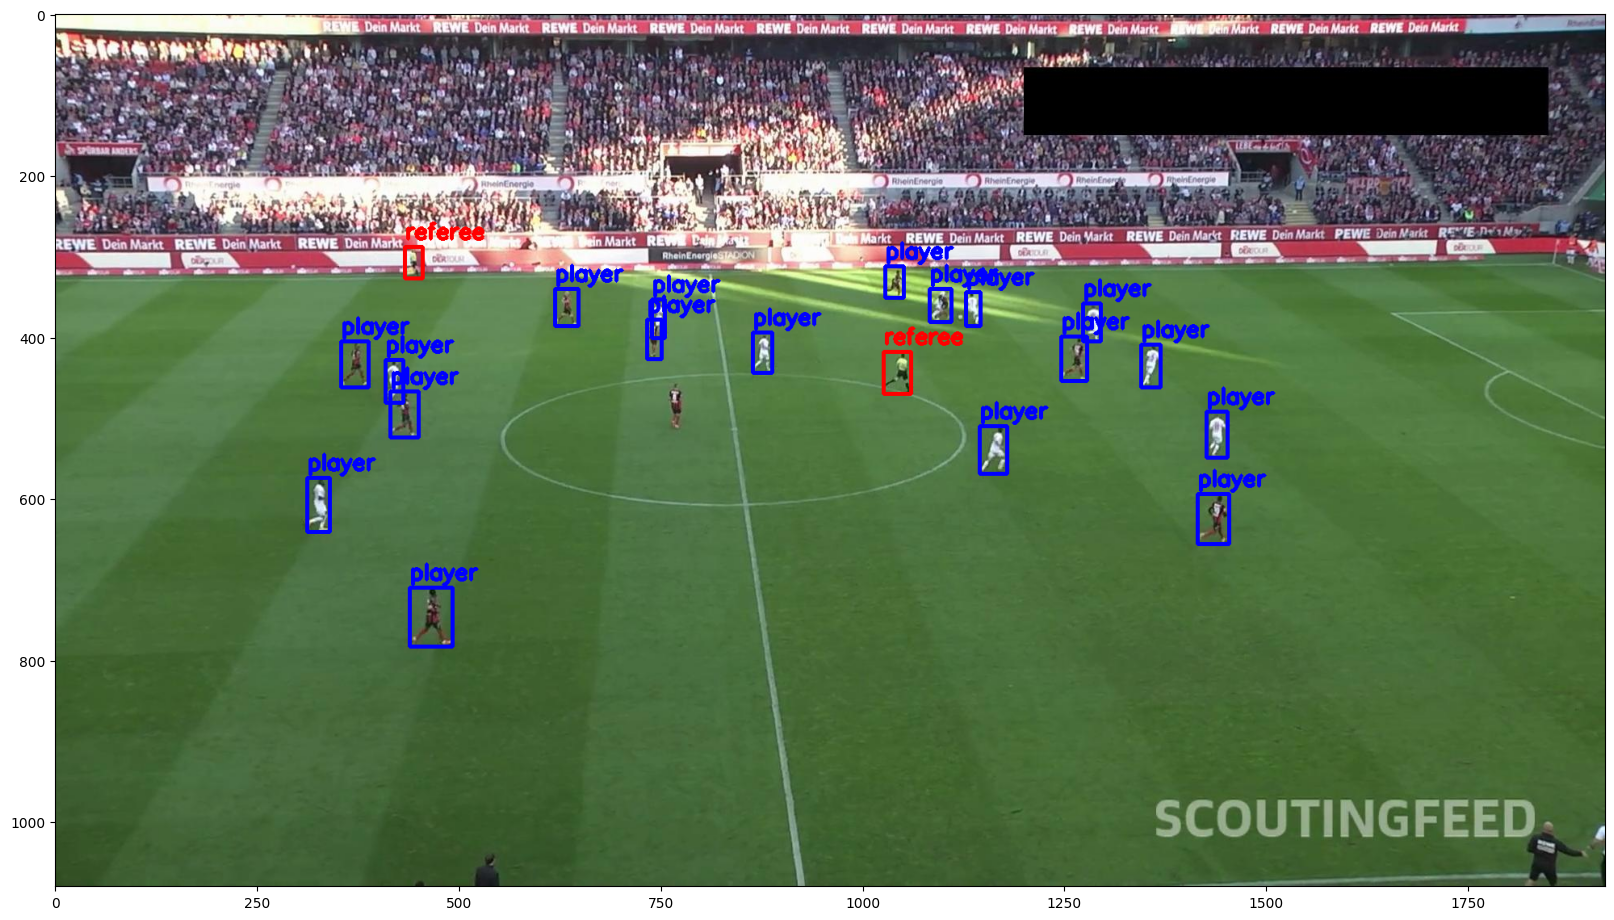

In [ ]:
plt.figure(figsize=(20, 20))
for pred in prediction[0]:
    bbox = pred.boxes.xyxy.int().tolist()[0]
    cls_ind = pred.boxes.cls.int().item()
    cls = ind_to_cls[cls_ind]
    cv2.rectangle(img=image, pt1=tuple(bbox[:2]), pt2=tuple(bbox[2:]), color=colors[cls], thickness=3)
    cv2.putText(image, cls, (bbox[0], bbox[1]-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, colors[cls], 3)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.grid(False)
plt.show()

### Try inference with video

In [ ]:
from google.colab.patches import cv2_imshow
video_path = "/content/drive/MyDrive/football/test.mp4"

cap = cv2.VideoCapture(video_path)

# Video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Jump to 12th second
start_second = 12
start_frame = int(fps * start_second)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Output video writer
output_path = "inference_from_12s.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process for N seconds (e.g., 10 seconds)
duration_seconds = 10
max_frames = int(fps * duration_seconds)
frame_count = 0

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]

    for box in results.boxes:
        cls_id = int(box.cls)
        class_name = ind_to_cls.get(cls_id, "unknown")
        color = colors.get(class_name, (255, 255, 255))
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])

        label = f"{class_name} {conf:.2f}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    out.write(frame)
    frame_count += 1

cap.release()
out.release()

In [ ]:
from google.colab.patches import cv2_imshow
video_path = "/content/drive/MyDrive/football/test-2.mp4"

cap = cv2.VideoCapture(video_path)

# Video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Jump to 12th second
start_second = 12
start_frame = int(fps * start_second)
cap.set(cv2.CAP_PROP_POS_FRAMES, start_frame)

# Output video writer
output_path = "inference_from_12s_2.mp4"
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process for N seconds (e.g., 10 seconds)
duration_seconds = 10
max_frames = int(fps * duration_seconds)
frame_count = 0

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)[0]

    for box in results.boxes:
        cls_id = int(box.cls)
        class_name = ind_to_cls.get(cls_id, "unknown")
        color = colors.get(class_name, (255, 255, 255))
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        conf = float(box.conf[0])

        label = f"{class_name} {conf:.2f}"
        cv2.rectangle(frame, (x1, y1), (x2, y2), color, 2)
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)

    out.write(frame)
    frame_count += 1

cap.release()
out.release()

### Use with ByteTrack

- Track an object (player/referee/ball) as it move to a new frame
- Can help to idenfy SINGLE player and assign them jersey

In [ ]:
!pip install ultralytics opencv-python

In [ ]:
from pathlib import Path
from ultralytics import YOLO

path_project = Path("/content/drive/MyDrive/football/")

path_weights  = path_project/ "runs/detect/train/weights/best.pt"

assert path_weights.exists(), f"Model weights not found at {path_weights}"

yolo_model = YOLO(path_weights)

ind_to_cls = {
    0: "ball",
    1 : "goalkeeper",
    2 : "player",
    3 : "referee"
}

# colors = {
#     "ball": (0,200,200), # cyan
#     "player": (255,0,0), # red
#     "goalkeeper":(255,0,255), # purple
#     "referee": (0,0,255), # blue
# }

colors = {
    "0": (0,200,200), # cyan
    "2": (255,0,0), # red
    "1":(255,0,255), # purple
    "3": (0,0,255), # blue
}

In [ ]:
print(yolo_model.names)

{0: 'ball', 1: 'goalkeeper', 2: 'player', 3: 'referee'}


In [ ]:
import base64
from IPython.display import HTML, display

def show_mp4(path, width=640):
    """
    Reads an MP4 from disk and embeds it as an HTML5 video in Colab.

    Args:
        path (str): path to the .mp4 file
        width (int): display width in pixels
    """
    # Read & encode
    with open(path, 'rb') as f:
        mp4_bytes = f.read()
    b64 = base64.b64encode(mp4_bytes).decode()
    # Build HTML
    html = f'''
    <video width="{width}" controls autoplay loop muted playsinline>
      <source src="data:video/mp4;base64,{b64}" type="video/mp4">
      Your browser does not support HTML5 video.
    </video>
    '''
    display(HTML(html))

In [ ]:
import random

def bytetrack(path, output_path="output.mp4", target_classes=None):
    # Initialize video capture
    cap = cv2.VideoCapture(path)
    if not cap.isOpened():
        print("Error opening video file")
        return

    # Get video properties
    fps = cap.get(cv2.CAP_PROP_FPS)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()

    # Initialize video writer
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    # Dictionary to store unique colors for each track ID
    class_colors = {
      "ball": (0,200,200),
      "player": (255,0,0),
      "goalkeeper":(255,0,255),
      "referee": (0,0,255),
    }

    # Class IDs for person (0) and football
    target_classes = [0, 1, 2, 3]

    # Track objects in video
    results = yolo_model.track(
        source=path,
        tracker="bytetrack.yaml",
        persist=True,
        stream=True,
        classes=target_classes
    )

    for frame_id, result in enumerate(results):
        frame = result.orig_img.copy()  # Original frame without annotations

        if result.boxes is not None and result.boxes.id is not None:
            # Get detection data
            track_ids = result.boxes.id.int().cpu().tolist()
            bboxes = result.boxes.xyxy.cpu().tolist()
            class_ids = result.boxes.cls.int().cpu().tolist()

            # Process detections
            for track_id, bbox, cls_id in zip(track_ids, bboxes, class_ids):
                # Only process person and football classes
                if cls_id not in target_classes:
                    continue

                # Assign unique color for each track ID
                # if track_id not in track_id_colors:
                #     track_id_colors[track_id] = (
                #         random.randint(0, 255),
                #         random.randint(0, 255),
                #         random.randint(0, 255)
                #     )
                # color = track_id_colors[track_id]
                # print(cls_id)
                color = colors.get(cls_id, (0, 0, 0))  # fallback to black

                # Convert coordinates to integers
                x1, y1, x2, y2 = map(int, bbox)

                # Draw bounding box
                cv2.rectangle(frame, (x1, y1), (x2, y2), color, 3)

                # Display track ID with white background
                text = f"{yolo_model.names.get(cls_id)} {track_id}"
                (text_width, text_height), baseline = cv2.getTextSize(
                    text, cv2.FONT_HERSHEY_SIMPLEX, 1.0, 2
                )

                # Calculate background rectangle coordinates
                bg_x1 = x1
                bg_y1 = y1 - 15 - text_height  # Position above bounding box
                bg_x2 = x1 + text_width
                bg_y2 = y1 - 15 + baseline

                # Ensure background stays within frame
                bg_y1 = max(0, bg_y1)  # Don't go above top of frame
                bg_y2 = min(frame.shape[0], bg_y2)  # Don't go below bottom

                # Draw filled white rectangle
                cv2.rectangle(frame, (bg_x1, bg_y1), (bg_x2, bg_y2), (255, 255, 255), -1)

                # Draw text
                cv2.putText(frame, text,
                            (x1, y1 - 15),
                            cv2.FONT_HERSHEY_SIMPLEX,
                            1.0, color, 2)

        # Write frame to output video
        out.write(frame)
        print(f"Processed frame {frame_id}", end='\r')

    # Release video writer
    out.release()
    print(f"\nSaved video with enhanced track IDs: '{output_path}'")

In [ ]:
bytetrack("/content/drive/MyDrive/football/test-3.mp4")


video 1/1 (frame 1/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 3 players, 25.3ms
video 1/1 (frame 2/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 6 players, 1 referee, 25.5ms
video 1/1 (frame 3/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 8 players, 1 referee, 25.2ms
video 1/1 (frame 4/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 12 players, 1 referee, 25.2ms
video 1/1 (frame 5/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 11 players, 1 referee, 26.1ms
video 1/1 (frame 6/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 10 players, 1 referee, 25.2ms
video 1/1 (frame 7/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 11 players, 1 referee, 26.0ms
video 1/1 (frame 8/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 11 players, 1 referee, 25.2ms
video 1/1 (frame 9/479) /content/drive/MyDrive/football/test-3.mp4: 384x640 11 players, 1 referee, 20.7ms
video 1/1 (frame 10/479) /content/drive/MyDrive/football/te